# Тема “Обучение без учителя”

### Задание 1

In [213]:
# Импортируйте библиотеки pandas, numpy и matplotlib.

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [214]:
# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

from sklearn.datasets import load_boston

In [215]:
# Создайте датафреймы X и y из этих данных.

X = pd.DataFrame(data=load_boston()['data'], columns=load_boston()['feature_names'])
y = pd.DataFrame(data=load_boston()['target'], columns=['price'])

In [216]:
# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split 
# так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, train_size=0.8, random_state=42)

In [217]:
X_train = X_train.sort_index()
X_test = X_test.sort_index()
y_train = y_train.sort_index()
y_test = y_test.sort_index()

In [218]:
# Масштабируйте данные с помощью StandardScaler.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [219]:
# Постройте модель TSNE на тренировочных данных с параметрами: n_components=2, learning_rate=250, random_state=42.

from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, learning_rate=250, random_state=42)

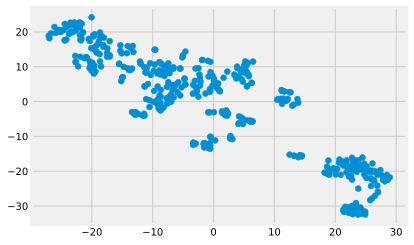

In [220]:
# Постройте диаграмму рассеяния на этих данных.

X_train_scaled_tsne = tsne_model.fit_transform(X_train_scaled)

plt.scatter(X_train_scaled_tsne[:, 0], X_train_scaled_tsne[:, 1])

***Когда мы строим диаграмму рассеяния на масштабированных данных, то что из себя представляют значения осей? В "физическом" смысле. Никак не могу понять, что это за значения.***

### Задание 2

In [221]:
# С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
# Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

from sklearn.cluster import KMeans

# print(KMeans.__doc__)

kmeans_model = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans_model.fit_predict(X_train_scaled)

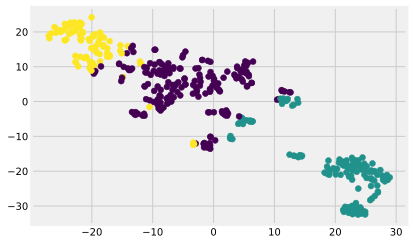

In [222]:
# Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, 
# и раскрасьте точки из разных кластеров разными цветами.

plt.scatter(X_train_scaled_tsne[:, 0], X_train_scaled_tsne[:, 1], c=labels_train)

***Я правильно понимаю, что отметить на графике центры кластеров у меня не получится, так как модель tsne_model не умеет трансформировать данные (см. следующую ячейку)***

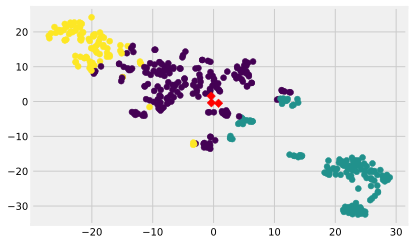

In [223]:
centers_scaled = kmeans_model.cluster_centers_
centers_scaled_tsne = tsne_model.fit_transform(centers_scaled)

plt.scatter(X_train_scaled_tsne[:, 0], X_train_scaled_tsne[:, 1], c=train_labels)
plt.scatter(centers_scaled[:, 0], centers_scaled[:, 1], marker='D', color='red')

In [224]:
# Вычислите средние значения price и CRIM в разных кластерах.

X_train['price'] = y_train
X_train['cluster'] = labels_train

X_train.groupby('cluster').agg({'price': 'mean', 'CRIM': 'mean'})

,price,CRIM
cluster,,
0,24.958115,0.421660
1,16.165354,10.797028
2,27.788372,0.073566


### *Задание 3

In [225]:
# Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

labels_test = kmeans_model.predict(X_test_scaled)

In [226]:
# Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

X_test['price'] = y_test
X_test['cluster'] = labels_test

X_test.groupby('cluster').agg({'price': 'mean', 'CRIM': 'mean'})

,price,CRIM
cluster,,
0,21.860784,0.266079
1,16.437143,10.165531
2,31.350000,0.062060
